# 머신러닝   
       
7주 2강: Linear Regression 실습

숭실대학교<br/>
AI융합학부<br/>
윤진혁<br/>

# 경사하강법 Remind
* 경사하강법(gradient descent): 경사를 하강하면서 수식을 최소화하는 매개변수의 값을 찾아내는 방법
* 점이 최솟값을 달성하는 방향으로 점점 내려갑니다
  * 몇 번 적용할 것인가? : 많이 실행할수록 최솟값에 가까워집니다. 다만 시간이 더 많이 걸립니다.
  * 한 번에 얼마나 많이 내려갈 것인가?: 한 번에 얼마나 많은 공간을 움직일지? 
  * 경사(gradient) : 경사하강법의 하이퍼 매개변수

# 경사하강법을 실제 해 봅시다. 
* $f(x) = x^2 \rightarrow \frac{dy}{dx}=2x$ 
* $x_{new} = x_{old} - \alpha \times f'(x_{old})$

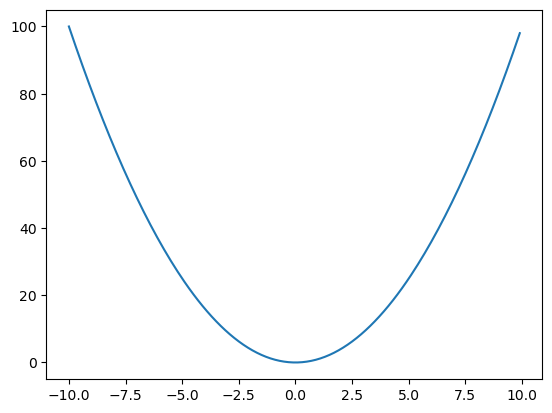

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x= np.arange(-10,10,0.1)
f_x = x ** 2
#일단 f(x)를 그려봅시다

plt.plot(x, f_x)
plt.show()

* 경사만큼 x를 계속 변화시키는 작업을 해 봅시다.

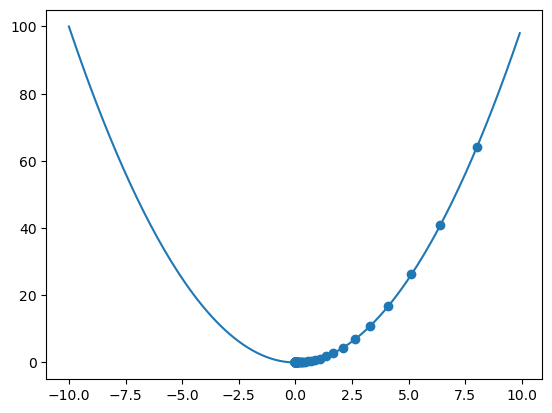

In [2]:
x_new = 10
derivative = []
y = []
learng_rate= 0.1
for i in range(100):
    old_value = x_new
    derivative.append(old_value - learng_rate * 2 * old_value)
    x_new = old_value - learng_rate * 2 * old_value
    y.append(x_new ** 2)

plt.plot(x, f_x)
plt.scatter(derivative, y)
plt.show()

## 여기서 알 수 있는 것
* 평형점 (혹은 극점)에 다다를 수록 기울기가 줄어듭니다
  * 이는 "미분 가능한" 함수라면 보통 동일한 특성을 가집니다
* 즉, 상수 learning rate를 가졌더라도 극점 근처가 되면 점점 한 step의 차이가 줄어듭니다
  * 이는 경사하강법이 정답에 다다를수록 정확한 값을 찾아가게 해주지만 (먼 거리에서는 빠르게, 가까운 거리에서는 느리게) 
  * 반대로 "진짜 극점"을 찾는 것을 어렵게 합니다. 

# 선형회귀 성능을 재 봅시다
* 훈련/테스트 분할(train/test split) : 머신러닝에서 데이터를 학습을 하기 위한 학습 데이터셋(train dataset)과 학습의 결과로 생성된 모델의 성능을 평가하기 위한 테스트 데이터셋(test dataset)으로 나눕니다
* 모델이 새로운 데이터셋에도 일반화(generalize)하여 처리할 수 있는지를 확인합니다.

## scikit-learn으로 해 봅시다
* sklearn 모듈이 제공하는 train_test_split 함수가 가장 흔히 쓰입니다.
  * X와 y 벡터 값을 각각 넣고
  * 매개변수 test_size에 테스트 데이터로 사용할 데이터의 비율을 지정합니다.
  * random_state는 무작위 난수를 생성하기 위한 seed 값입니다. 재현성을 위해서 고정된 값을 써 봅시다.
* test-train-valid 3개 셋으로 분할하는 것은 어떻게 하면 될까요?

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

## MAE
* MAE(Mean Absolute Error) : 평균 절대 잔차
* 모든 테스트 데이터에 대해 예측값과 실제값의 차이에 대해 절댓값을 구하고, 이 값을 모두 더한 후에 데이터의 개수만큼 나눈 결과
* 직관적으로 예측값과 실측값의 차이를 알 수 있습니다.
* sklearn 모듈에서는 median_absolute_error 함수로 MAE를 구하면 됩니다
  * 단점은 무엇일까요?

In [5]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

np.float64(0.5)

## MSE / RMSE
* MSE (Mean Squred Error) 오차에 대해 제곱을 한 다음 모든 값을 더하여 평균
* RMSE(Root Mean Squared Error) : MSE의 제곱근을 구함
* MAE에 비해 먼 점에 대한 패널티가 더 큼 상대적으로 값의 차이가 더 큼
  * 차이가 크게 나는 값에 대해서 페널티를 주고 싶다면 RMSE 값을 사용
* sklearn 모듈에서 RMSE를 직접적으로 지원하지는 않고 MSE(mean_squared_error)만 지원

In [6]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(mean_squared_error(y_true, y_pred)) # MSE
print(np.sqrt(mean_squared_error(y_true, y_pred))) # RMSE
print(root_mean_squared_error(y_true, y_pred)) # RMSE  / true랑 pred순서바꿔도 결과 동일

0.375
0.6123724356957945


# $R^2$-score 
* 결정계수(R-squared) : 두 개의 값의 증감이 얼마나 일관성을 가지는지 나타내는 지표
* 값이 크면 클수록 실제값도 커지고, 예측값이 작으면 실제값도 작아짐
* 여러 모델 중 어떤 모델이 조금 더 상관성이 있는지를 나타낼 수 있지만, 값의 차이 정도가 얼마인지는 나타낼 수 없다는 한계가 있음

In [7]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

# 선형회귀를 구현해 봅시다
## 데이터 생성하기
* $y = x + 25$ 에 노이즈를 주어서 만들어봅시다. 

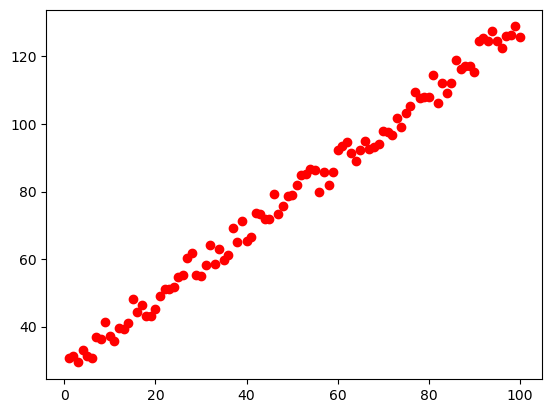

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random

def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    
    for i in range(0, numPoints):
        x[i][0] = 1 # (2) 데이터 x의 상수항에는 1
        x[i][1] = i # (3) 데이터 x 값은 1씩 증가시킴
        y[i] = (i + bias) + random.uniform(0, 1) * variance
        # (4) 데이터 y에 bias 생성
    return x, y

x, y = gen_data(100, 25, 10) # (1) 100개의 데이터 생성

plt.plot(x[:,1]+1,y,"ro") # (5) 데이터 x와 y의 상관관계 그래프 작성
plt.show()

## 경사하강법 적용
* 파라미터가 2개이지만, 각각은 따로 작동할 수 있습니다.

In [9]:
def gradient_descent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose() # (6) x 입력값들을 transpose 합니다. x가 현재는 (1, i) 형태로 되어있으므로...
    theta_list = [] # (7) theta 값을 저장할 리스트를 생성해 둡니다.
    cost_list = [] # (8) 비용 값을 저장할 리스트를 생성해 둡니다.
    for i in range(0, numIterations): # (9) 최대 iteration값 만큼 반복 시작
        hypothesis = np.dot(x, theta) # (10) 현재 모델에서 y estimate 값 generate
        loss = hypothesis - y # (11) 예측값과 실제 값 차이를 loss로 저장합시다.
        cost = np.sum(loss ** 2) / (2 * m) # (12) 비용함수를 계산합니다. m은 총 점의 수. 
        gradient = np.dot(xTrans, loss) / m # (13) 편미분 값으로 gradient를 계산합니다. 
        theta = theta - alpha * gradient # (14) 가중치 값인 theta 값이 업데이트 됩니다. 
        if i % 250 == 0: # (15) 250회마다 업데이트 해서 저장합니다. 
            theta_list.append(theta)
        cost_list.append(cost)
    return theta,np.array(theta_list), cost_list # (16)

m, n = np.shape(x) # (1)
numIterations= 5000 # (2)
alpha = 0.0005 # (3)
theta = np.ones(n) # (4)

theta, theta_list, cost_list = gradient_descent(x, y, theta, alpha, m, numIterations) # (5)

/home/jhyun/anaconda3/envs/ml2024/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_1971653/1524439576.py:8: RuntimeWarning: overflow encountered in square
  cost = np.sum(loss ** 2) / (2 * m) # (12) 비용함수를 계산합니다. m은 총 점의 수.


* 실제로 어떤 식으로 변하는지 봅시다

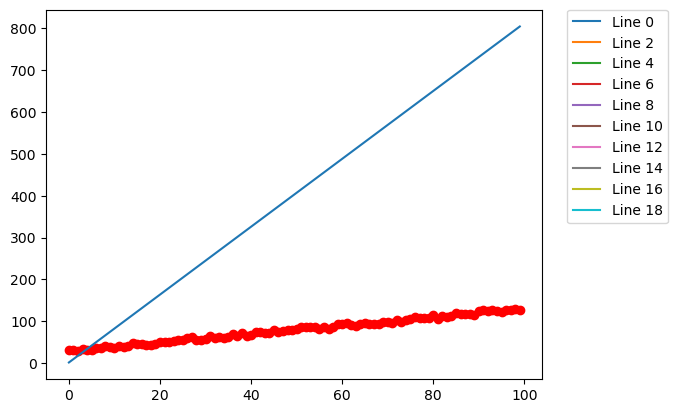

In [10]:
y_predict_step= np.dot(x, theta_list.transpose())
plt.plot(x[:,1],y,"ro")
for i in range (0,20,2):
    plt.plot(x[:,1], y_predict_step[:,i], label='Line %d'%i)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

* 최종적인 값을 봅시다

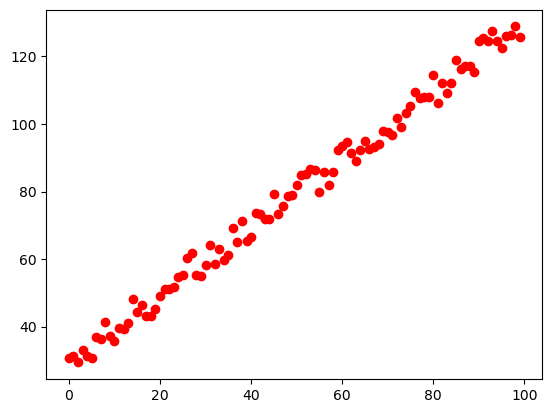

In [11]:
y_predict= np.dot(x, theta)
plt.plot(x[:,1],y,"ro")
plt.plot(x[:,1],y_predict, lw=3)
plt.show()

* cost가 감소하는 것을 봅시다

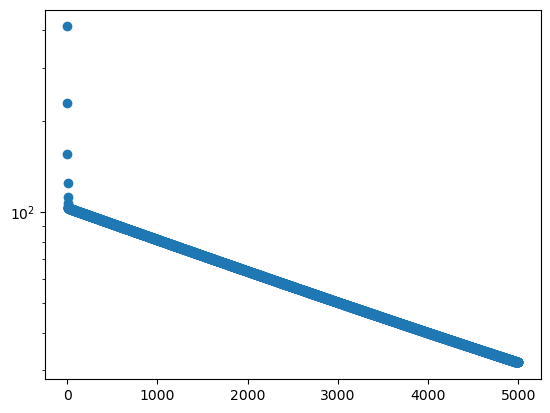

In [12]:
iterations = range(len(cost_list))

plt.scatter(iterations,cost_list)
plt.yscale("log")
#plt.xscale("log")
plt.show()

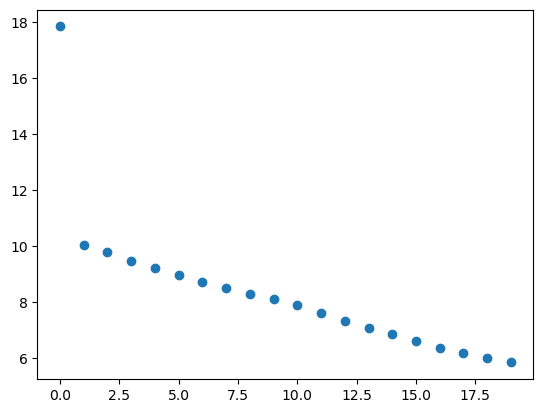

In [13]:
mae_list = []
y_pred_list = np.dot(x, theta_list.transpose()).transpose()
for i in range(len(theta_list)):
    mae_list.append(median_absolute_error(y, y_pred_list[i]))
plt.scatter(np.arange(len(theta_list)), mae_list)

* $R^2$ score가 증가하는 것을 봅시다

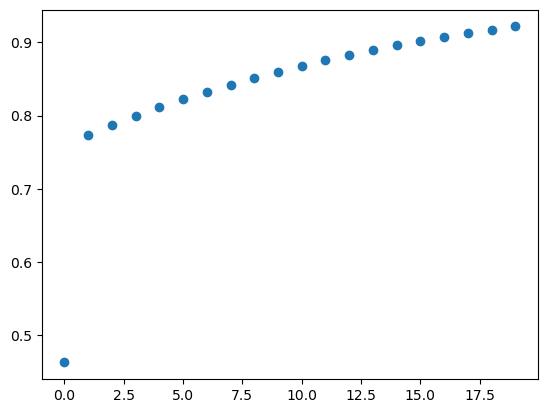

In [14]:
r2_list = []
for i in range(len(theta_list)):
    r2_list.append(r2_score(y, y_pred_list[i]))
plt.scatter(np.arange(len(theta_list)), r2_list)

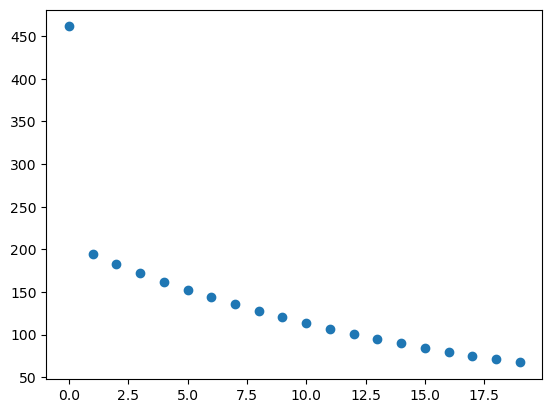

In [15]:
mse_list = []
for i in range(len(theta_list)):
    mse_list.append(mean_squared_error(y, y_pred_list[i]))
plt.scatter(np.arange(len(theta_list)), mse_list)